In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/phishingemails/Phishing_Email.csv


We will create a model that determines whether an email is safe or phishing using the data set.

# IMPORT LIBRARIES

# # # Libraries 

NumPy; a library for numerical operations, arrays, and matrices.

Pandas; used for data manipulation and analysis.

TF-IDF Vectorizer to convert text data into numerical feature vectors.

Logistic Regression algorithm for classification tasks.

Accuracy_score: Calculate the accuracy of the model’s predictions.

Confusion_matrix :Shows the number of true positives, true negatives, false positives, and false negatives in a matrix format.

Classification_report:Provides detailed performance metrics such as precision, recall, F1-score, and support for each class.



In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


# IMPORT DATASET

In [3]:
file_path = "/kaggle/input/phishingemails/Phishing_Email.csv"
df = pd.read_csv(file_path)

In [4]:
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18650 non-null  int64 
 1   Email Text  18634 non-null  object
 2   Email Type  18650 non-null  object
dtypes: int64(1), object(2)
memory usage: 437.2+ KB


Is data contains missing data?

In [6]:
df.isnull().sum()

Unnamed: 0     0
Email Text    16
Email Type     0
dtype: int64

Data contains 16 missings. Let's remove missings.

In [7]:
df = df.dropna()

In [8]:
df = df[df['Email Text'].str.lower() != 'empty']

# LOGISTIC REGRESSION

We use  a logistic regression model for predict the data.

Logistic regression is one of the most commonly used classification algorithms in machine learning and statistics.

In model:

Email Text will be independent variable (X)

Email Type will be dependent variable (Y)




We need to convert the type of the Email Type variable to a numeric label.

Because LogisticRegression can only work with numerical inputs and outputs.
LogisticRegression cannot directly understand text, categorical values, or string expressions.

In [9]:
mapping = {'Safe Email': 0, 'Phishing Email': 1} 

df['email_type_encoded'] = df['Email Type'].map(mapping)

In [10]:
X=df["Email Text"]
Y=df['email_type_encoded']

# ##  Train-Test

 ****Let's allocate 80% of the data for training and 20% for testing.(test_size=0.2)****


The main reason for dividing the data set into training and testing is to accurately evaluate the model's learning and generalization abilities.

The model is fitted using the training dataset, and its performance is assessed on unseen test data.

This step is essential to assess the model’s generalization capacity — its ability to make accurate predictions on new data.


In [11]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=20)

In [12]:
feature_extraction=TfidfVectorizer(min_df=1,stop_words="english",lowercase=True)


TfidfVectorizer  converts each text into a series of numbers.

This allows texts to be fed into the model as numerical data.

min_df=1    Take words that appear in at least 1 document (does not filter out very rare ones).

stop_words=‘english’    Removes meaningless words in English such as “the, and, is, in”.

lowercase=True    Converts all words in the text to lowercase (Hello → hello).

****Let's make X_train and X_test suitable for entering the model using feature_extraction.****


In [13]:
X_train_features=feature_extraction.fit_transform(X_train)

X_test_features=feature_extraction.transform(X_test)

****X_train_features:****

It is first trained (fit) with the TF-IDF vectorizer, then transformed.

In other words: which words are present, how important each word is → is learned and converted into numbers.

****X_test_features:****

The test data is only converted (not fitted!) using the same rules.

The test data is converted to a vector based on the words learned from the training data.

****Model****

In [14]:
model = LogisticRegression()
model.fit(X_train_features, Y_train)

LogisticRegression()

In [15]:
y_pred = model.predict(X_test_features)


print("Accuracy:", accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))

Accuracy: 0.9834299917149959
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2220
           1       0.98      0.97      0.98      1401

    accuracy                           0.98      3621
   macro avg       0.98      0.98      0.98      3621
weighted avg       0.98      0.98      0.98      3621

[[2197   23]
 [  37 1364]]


****Accuracy:****
 0.983, which means the model correctly predicts approximately 98% of the test data.

****Precision:****

Safe emails (0): 0.98

Phishing emails (1): 0.98
→ The model makes very few false alarms.

****Recall:****

Safe emails (0): 0.99

Phishing emails (1): 0.97

→ It successfully detects almost all phishing emails.

****F1-Score:****

Safe: 0.99

Phishing: 0.98

→ Balanced and reliable predictions for both classes.

# ## Confusion Matrix

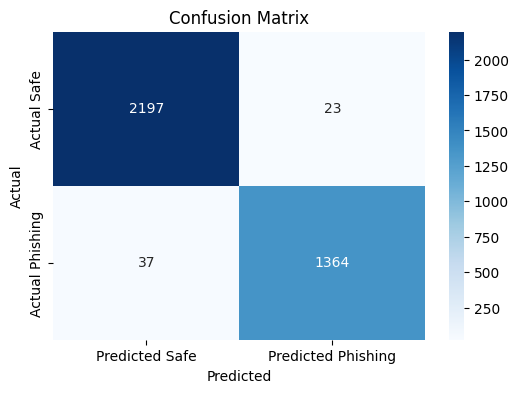

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix 
cm = np.array([
    [2197 ,  23],
 [ 37, 1364]])

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Predicted Safe", "Predicted Phishing"], yticklabels=["Actual Safe", "Actual Phishing"])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

The model predicts that 37 of the phishing emails are safe.

The model predicts that 23 of the safe emails are phishing.

****We can analyze the incorrect predictions to understand where the model fails.****

In [17]:
results_df = pd.DataFrame({
    'Text': X_test.reset_index(drop=True),
    'True Label': Y_test.reset_index(drop=True),
    'Predicted Label': y_pred
})


wrong_preds = results_df[results_df['True Label'] != results_df['Predicted Label']]

In [18]:
wrong_preds

,Text,True Label,Predicted Label
6,"So, a new family moved in down the street, wit...",0,1
109,as a promising energy professional . . . indus...,0,1
112,ad - it ' s amazing how differently the girls ...,1,0
149,"referred by , james hi , i found following web...",1,0
294,"new accts : exclusive free ebooks , software ,...",1,0
351,fortune here ' s the fortune link . . .,0,1
370,"wndows x , p home update minnesota , which can...",1,0
459,>>From the BBC website - www.bbc.co.uk Tuesday...,0,1
526,"e - mail hey daren , is this your e - mail add...",0,1
589,41 . npe . girth ? really lay the pipe to the ...,1,0


# Does cleaning the Email Text lead to better model performance?

****Write the words in lowercase****

In [19]:
df["Email Text"]=df["Email Text"].apply(lambda x: " ".join(x.lower()for x in x.split()))


****Remove punctuation marks and numbers****

In [20]:
df["Email Text"]=df["Email Text"].str.replace(r"[^\w\s]","",regex=True)
df["Email Text"]=df["Email Text"].str.replace(r"\d","",regex=True)

****Lemmetization****

Lemmatization is the process of converting a word to its root form in the field of natural language processing (NLP).

In [21]:
!pip install textblob
from textblob import Word
!pip install nltk
import nltk
nltk.download("omw-1.4")
nltk.download("wordnet")


df["Email Text"]=df["Email Text"].apply(lambda x: " ".join(Word(i).lemmatize() for i in x.split()))

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [22]:
df


,Unnamed: 0,Email Text,Email Type,email_type_encoded
0,0,re disc uniformitarianism re sex lang dick hud...,Safe Email,0
1,1,the other side of galicismos galicismo is a sp...,Safe Email,0
2,2,re equistar deal ticket are you still availabl...,Safe Email,0
3,3,hello i am your hot lil horny toy i am the one...,Phishing Email,1
4,4,software at incredibly low price lower drapery...,Phishing Email,1
...,...,...,...,...
18644,18645,rick moen a ãcrit im confused i thought it wa ...,Safe Email,0
18645,18646,date a lonely housewife always wanted to date ...,Phishing Email,1
18646,18647,request submitted access request for anita dup...,Safe Email,0
18647,18648,re important prc mtg hi dorn john a you discov...,Safe Email,0


****Use X1 as the new X and build a new Logistic model.****

In [23]:
X1=df["Email Text"]
X_train,X_test,Y_train,Y_test=train_test_split(X1,Y,test_size=0.2,random_state=20)

In [24]:
X_train_features=feature_extraction.fit_transform(X_train)

X_test_features=feature_extraction.transform(X_test)

In [25]:
model = LogisticRegression()
model.fit(X_train_features, Y_train)

LogisticRegression()

In [26]:
y_pred = model.predict(X_test_features)


print("Accuracy:", accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))

Accuracy: 0.975973487986744
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2220
           1       0.98      0.96      0.97      1401

    accuracy                           0.98      3621
   macro avg       0.98      0.97      0.97      3621
weighted avg       0.98      0.98      0.98      3621

[[2193   27]
 [  60 1341]]


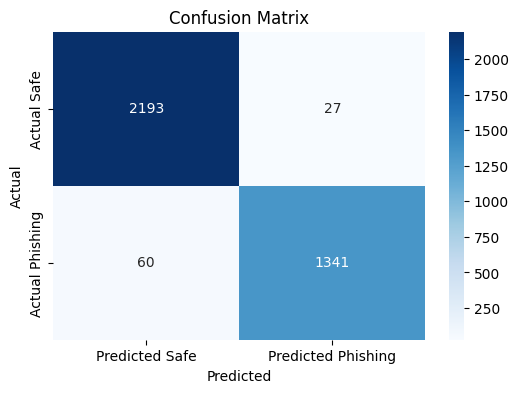

In [27]:
# Confusion matrix 
cm = np.array([[2193 ,  27],
 [  60 ,1341]])

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Predicted Safe", "Predicted Phishing"], yticklabels=["Actual Safe", "Actual Phishing"])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

Accuracy: 0.975       It is decreased

Wrong predicts are increased

The model is performing worse than before.

****Generally, data cleaning improves model prediction, but in our data it decreased it slightly.****